In [280]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [281]:
# Import data
df = pd.read_csv('../Resources/Cleaning2/merged_events_bio.csv')
df.head(5)

,Athlete_ID,Name,Age,Sex,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [282]:
df = df.rename(columns={'Sex': 'Gender'})
df.head(5)

,Athlete_ID,Name,Age,Gender,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [283]:
# Define winter/summer sports

def is_winter_sport(sport):
    winter_sports = ['Alpine Skiing', 'Alpinism', 'Bandy', 'Biathlon', 'Bobsleigh', 'Cross Country Skiing',
                    'Curling', 'Dogsled Racing', 'Figure Skating', 'Freestyle Skiing', 'Ice Hockey',
                    'Ice Stock Sport', 'Luge', 'Military Ski Patrol', 'Nordic Combined', 'Short Track Speed Skating',
                    'Skeleton', 'Ski Jumping', 'Skijoring', 'Snowboarding', 'Speed Skating', 'Speed Skiing',
                    'Winter Pentathlon']
    return sport in winter_sports    

def is_summer_sport(sport):
    summer_sports['3x3 Basketball', 'Aeronautics', 'Alpinism', 'American Football', 'Archery', 'Art Competitions', 
                  'Artistic Gymnastics', 'Artistic Swimming',  'Athletics', 'Australian Rules Football', 'Automobile Racing',
                  'Badminton', 'Ballooning', 'Baseball', 'Basketball', 'Basque pelota', 'Beach Volleyball', 'Bicycle Polo',
                  'Boules', 'Bowling', 'Boxing', 'Canne De Combat', 'Canoe Marathon', 'Canoe Slalom', 'Canoe Sprint',
                  'Cricket', 'Croquet', 'Cycling BMX Freestyle', 'Cycling BMX Racing', 'Cycling Mountain Bike',
                  'Cycling Road', 'Cycling Track', 'Diving', 'Equestrian Dressage', 'Equestrian Driving',
                  'Equestrian Eventing', 'Equestrian Jumping', 'Equestrian Vaulting', 'Fencing', 'Figure Skating',
                  'Fishing', 'Football', 'GlÃ­ma', 'Gliding', 'Golf', 'Handball', 'Hockey', 'Ice Hockey',
                  'Jeu De Paume', 'Judo', 'Kaatsen', 'Karate', 'Kendo', 'Korfball', 'Lacrosse', 'Marathon Swimming',
                  'Modern Pentathlon', 'Motorboating', 'Motorcycle Sports', 'PesÃ¤pallo', 'Polo', 'Racquets', 'Rhythmic Gymnastics',
                  'Roller Hockey', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Savate', 'Shooting', 
                  'Skateboarding', 'Softball', 'Sport Climbing', 'Surfing', 'Swimming', 'Table Tennis', 'Taekwondo',
                  'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Waterskiing',
                  'Weightlifting', 'Wrestling', 'Wushu']
    return sport in summer_sports



In [284]:
# Define the medal colors
color_scale = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}

In [285]:
# Define a function to filter the data by gender, year, sport and country
def filter_data(df, gender, year, sport=None, country=None):
    if gender == 'Both':
        filtered_df = df
    else:
        filtered_df = df[df['Gender'] == gender]
        
    if year is not None:
        filtered_df = filtered_df[filtered_df['Year'] == year]
        filtered_df = filtered_df[filtered_df['Medal'].notna()]
    
    if sport != "ALL":
        filtered_df = filtered_df[filtered_df['Sport'] == sport]
    
    if country != "ALL":
        filtered_df = filtered_df[filtered_df['Country_Name'] == country]  
      
    return filtered_df

In [286]:
# Define a function to update the scatter plot based on the dropdown menus
def update_scatter_plot(gender, year, sport, country):
    # Filter the data by gender and year
    filtered_df = filter_data(df, gender, year, sport, country)
    
    # Create the scatter plot
    fig = px.scatter(filtered_df, x='Weight(kg)', y='Height(cm)', color='Medal', symbol='Gender', color_discrete_map=color_scale,
                     symbol_map={'M': 'square', 'F': 'circle'}, title=f'Olympic Medalists Height & Weight')
    
    # Set the axis labels
    fig.update_layout(xaxis_title='Weight (kg)', yaxis_title='Height (cm)')
    
    # Show the plot
    fig.show()

In [287]:
# Define the dropdown menus
gender_dropdown = widgets.Dropdown(
    options=['Both', 'M', 'F'],
    value='Both',
    description='Gender:')

years = df['Year'].unique().tolist()
years.sort(reverse=True)
year_dropdown = widgets.Dropdown(options=years, description='Year:')

sports = ["ALL"] + df['Sport'].unique().tolist()
sports.sort()
sport_dropdown = widgets.Dropdown(options=sports, value="ALL", description="Sport:")

countries = ["ALL"] + df['Country_Name'].unique().tolist()
countries.sort()
country_dropdown = widgets.Dropdown(options=countries, value="ALL", description='Country:')

In [288]:
# Define the callback functions
def on_gender_change(change):
    update_scatter_plot(change.new, gender_dropdown.value)

def on_year_change(change):
    update_scatter_plot(change.new, year_dropdown.value )
    
def on_sport_change(change):
    update_scatter_plot(change.new, sport_dropdown.value)
    
def on_country_change(change):
    update_scatter_plot(change.new, country_dropdown.value)

In [289]:
# Register the callback functions
gender_dropdown.observe(on_gender_change, names='value')
year_dropdown.observe(on_year_change, names='value')
sport_dropdown.observe(on_sport_change, names='value')
country_dropdown.observe(on_country_change, names='value')

In [321]:
# Display the dropdown menus
display(gender_dropdown)
display(year_dropdown)
display(sport_dropdown)
display(country_dropdown)

Dropdown(description='Gender:', index=2, options=('Both', 'M', 'F'), value='F')

Dropdown(description='Year:', options=(2022, 2020, 2018, 2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000,…

Dropdown(description='Sport:', index=22, options=('3x3 Basketball', 'ALL', 'Aeronautics', 'Alpine Skiing', 'Al…

Dropdown(description='Country:', index=697, options=(' Afghanistan', ' Albania', ' Albania  Australia', ' Alba…

In [322]:
# Print an error if a winter(summer) sport is matched with a year that only hosted summer(winter) events 
def check_season_sport(year,sport):
    season = filtered_df.loc[filtered_df['Year'] == year, 'Season'].iloc[0]
    if season == 'Summer' and is_winter_sport(sport):
        print("Error: You have selected a winter sport in a year where only summer sports were held.")
        return False
    elif season == 'Winter' and not is_winter_sport(sport):
        print("Error: You have selected a summer sport in a year where only winter sports were held.")
        return False
    else:
        return True

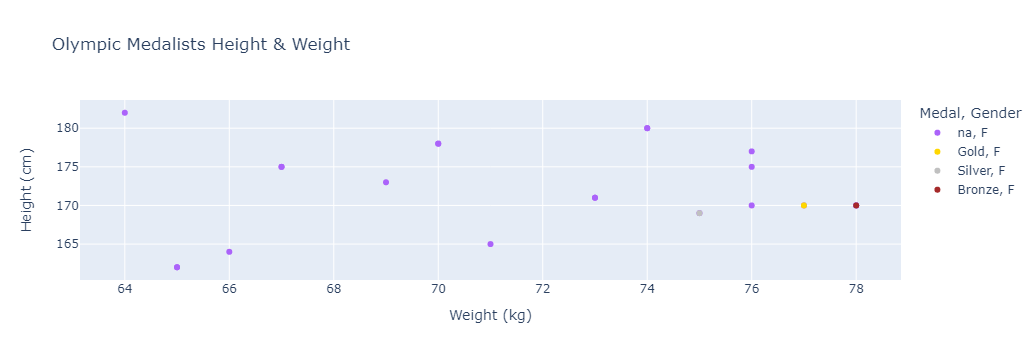

SyntaxError: 'return' outside function (948287358.py, line 6)

In [323]:
# Create the scatter plot
update_scatter_plot(gender_dropdown.value, year_dropdown.value, sport_dropdown.value, country_dropdown.value)

if sport is not None and year is not None:
    if not check_season_sport(year,sport):
        return check_season_sport(year,sport)
